# Diabetes Prediction using Logistic Regression

## Introduction
This notebook analyzes a diabetes dataset and builds a simple **Logistic Regression** model to predict whether a person has diabetes or not.  
We perform:
- Basic **Exploratory Data Analysis (EDA)**
- Model building **with and without feature scaling**
- Simple **performance comparison** using accuracy and confusion matrix

The goal is to understand how scaling affects model performance and to practice basic data science workflow.

---

## Import necessary libraries

In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Load dataset

In [73]:
# col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
df = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

## Display basic info

In [64]:
print("Basic Info:")
print(df.info())
print("\n First 5 Rows:")
print(df.head())

Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    object
 2   bp        769 non-null    object
 3   skin      769 non-null    object
 4   insulin   769 non-null    object
 5   bmi       769 non-null    object
 6   pedigree  769 non-null    object
 7   age       769 non-null    object
 8   label     769 non-null    object
dtypes: object(9)
memory usage: 54.2+ KB
None

 First 5 Rows:
      pregnant  glucose             bp           skin  insulin   bmi  \
0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   
4            1       89             66      

## Check for missing values

In [65]:
print("\n Missing Values:")
print(df.isnull().sum())


 Missing Values:
pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64


## Basic statistical summary

In [66]:
print("\n Statistical Summary:")
df.describe()


 Statistical Summary:


,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
count,769,769,769,769,769,769,769,769,769
unique,18,137,48,52,187,249,518,53,3
top,1,100,70,0,0,32,0.254,22,0
freq,135,17,57,227,374,13,6,72,500



## Matplotlib Visualizations


##  Histogram for all numeric columns

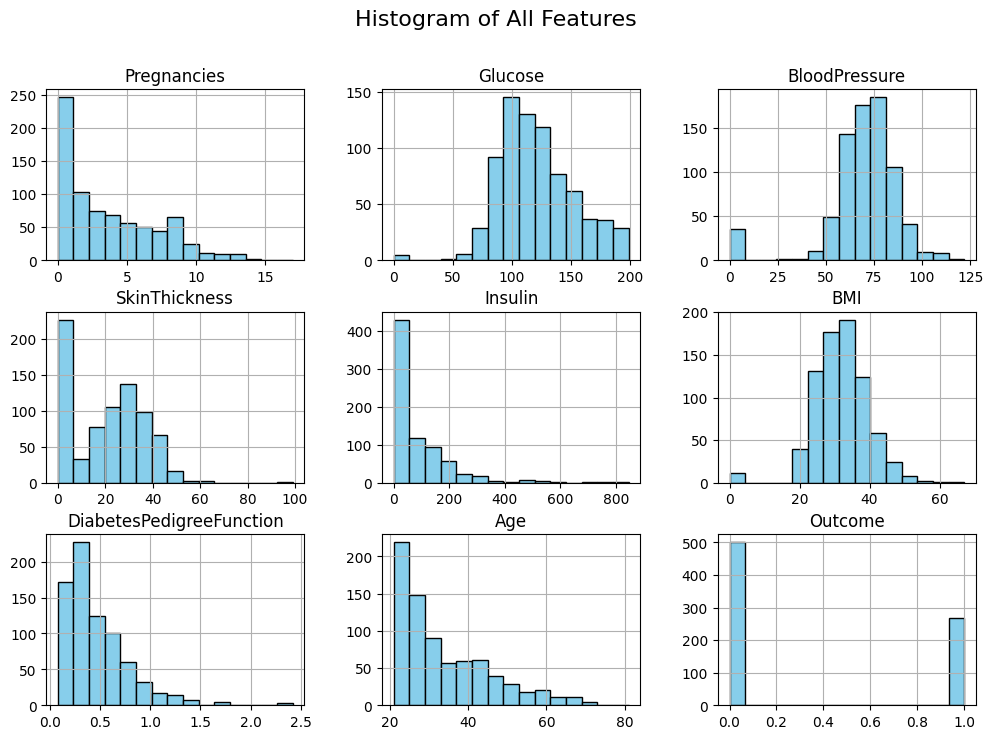

In [76]:
df.hist(figsize=(12, 8), bins=15, color='skyblue', edgecolor='black')
plt.suptitle("Histogram of All Features", fontsize=16)
plt.show()

##  Boxplots to detect outliers

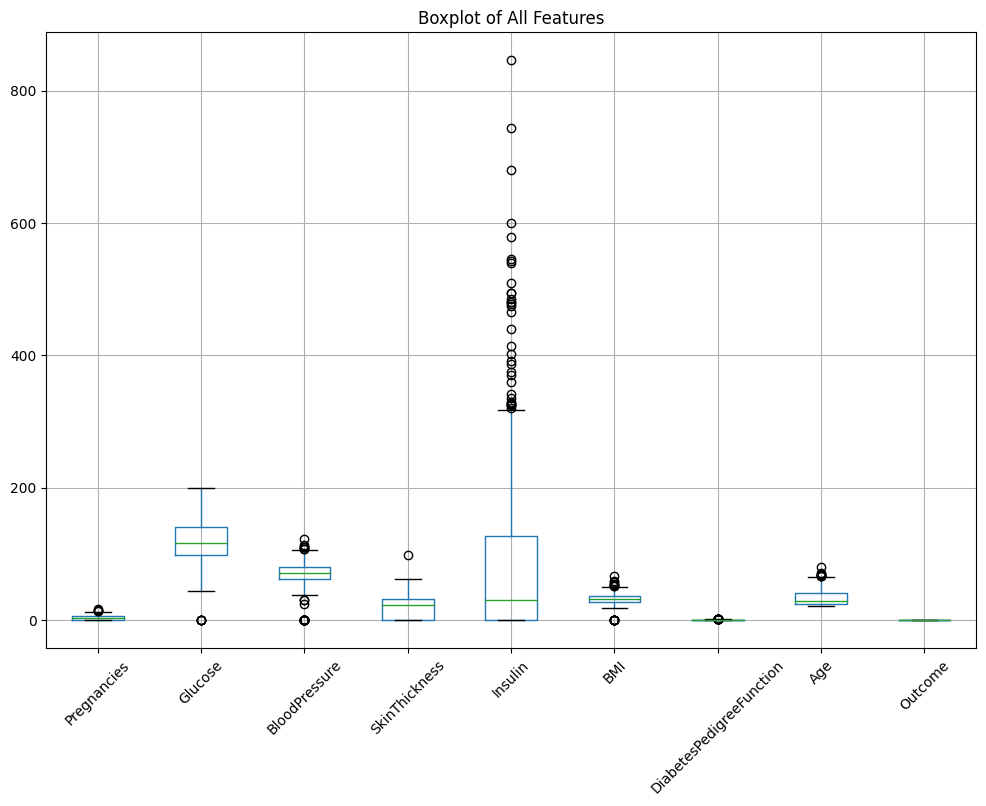

In [8]:
plt.figure(figsize=(12, 8))
df.boxplot()
plt.title("Boxplot of All Features")
plt.xticks(rotation=45)
plt.show()

## Correlation heatmap

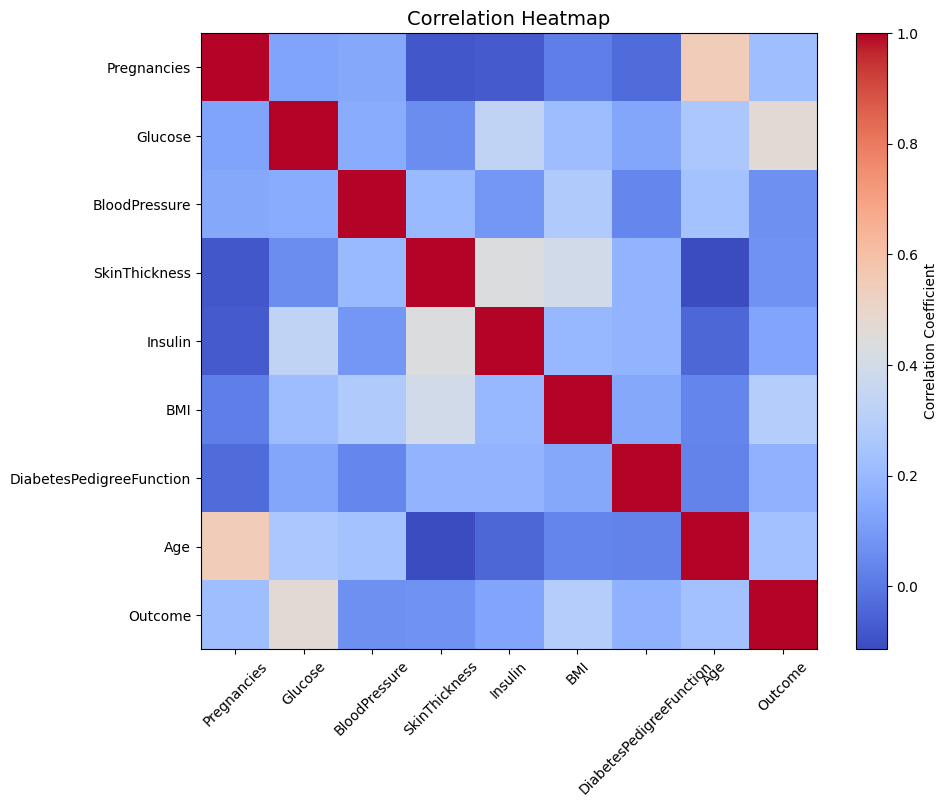

In [9]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label='Correlation Coefficient')
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

##  Pie chart for target variable distribution (if exists)


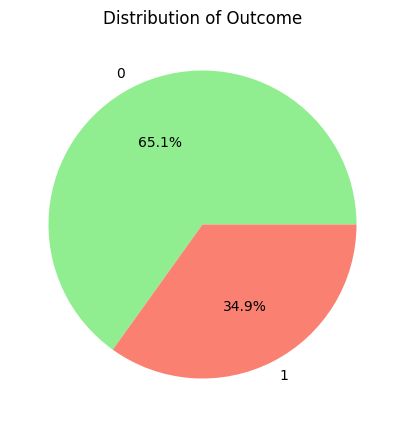

In [11]:
if 'Outcome' in df.columns or 'target' in df.columns:
    target_col = 'Outcome' if 'Outcome' in df.columns else 'target'
    plt.figure(figsize=(5, 5))
    df[target_col].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
    plt.title(f"Distribution of {target_col}")
    plt.ylabel("")
    plt.show()

# Logistic Regression (With & Without Scaling)

## Check target column

In [20]:
target_col = 'Outcome' if 'Outcome' in df.columns else df.columns[-1]
target_col

'Outcome'

## Split features,target and train/test data

In [46]:
X = df.drop(columns=[target_col])
y = df[target_col]

# Split train/test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

## Logistic Regression without Scaling

In [55]:
lr_raw = LogisticRegression(random_state=16,max_iter=1000)
lr_raw.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=16)

## Predictions 

In [56]:
y_pred_raw = lr_raw.predict(X_test)
y_pred_raw

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

## Evaluation & Confusion matrix visualization

 Logistic Regression (Without Scaling)
Accuracy: 0.7239583333333334

Confusion Matrix:
[[95 28]
 [25 44]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.77      0.78       123
           1       0.61      0.64      0.62        69

    accuracy                           0.72       192
   macro avg       0.70      0.71      0.70       192
weighted avg       0.73      0.72      0.73       192



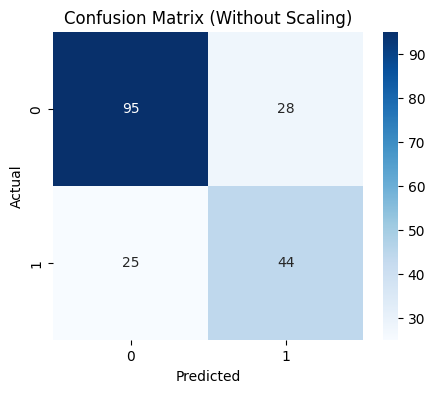

In [57]:
print(" Logistic Regression (Without Scaling)")
print("Accuracy:", accuracy_score(y_test, y_pred_raw))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_raw))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_raw))

#  Confusion matrix visualization
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_raw), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix (Without Scaling)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


## Logistic Regression with Min-Max Scaling

In [58]:

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_scaled = LogisticRegression(random_state=16,max_iter=1000)
lr_scaled.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, random_state=16)

In [59]:
# Predictions
y_pred_scaled = lr_scaled.predict(X_test_scaled)

## Evaluation & Confusion matrix visualization



 Logistic Regression (With Min-Max Scaling)
Accuracy: 0.7291666666666666

Confusion Matrix:
[[101  22]
 [ 30  39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.82      0.80       123
           1       0.64      0.57      0.60        69

    accuracy                           0.73       192
   macro avg       0.71      0.69      0.70       192
weighted avg       0.72      0.73      0.73       192



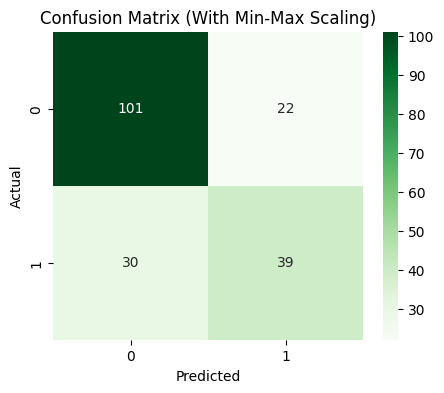

In [82]:
# Evaluation
print("\n\n Logistic Regression (With Min-Max Scaling)")
print("Accuracy:", accuracy_score(y_test, y_pred_scaled))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_scaled))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_scaled))

# Confusion matrix visualization
plt.figure(figsize=(5, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_scaled), annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix (With Min-Max Scaling)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 📊 Comparison

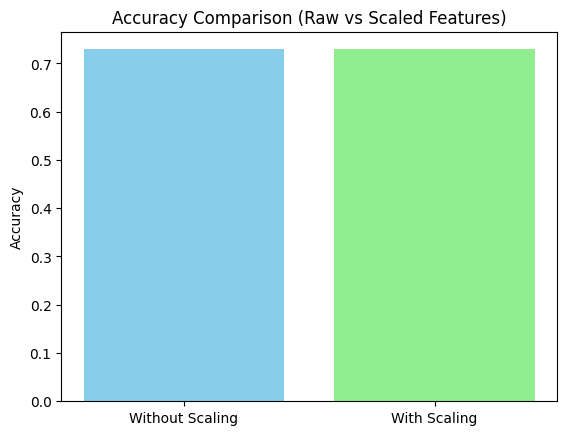

In [54]:
acc_raw = accuracy_score(y_test, y_pred_raw)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

plt.bar(['Without Scaling', 'With Scaling'], [acc_raw, acc_scaled], color=['skyblue', 'lightgreen'])
plt.title("Accuracy Comparison (Raw vs Scaled Features)")
plt.ylabel("Accuracy")
plt.show()


# 🧾 Key Points Summary

### 1️⃣ Exploratory Data Analysis (EDA)
- Checked for **missing values**, **data types**, and **statistical summary**.
- Used **histograms** and **boxplots** to visualize data distribution and outliers.
- Created a **correlation heatmap** to identify relationships among features.
- Displayed **target variable distribution** using a pie chart.

### 2️⃣ Logistic Regression Models
- Built **two models**:
  - ✅ **Without Feature Scaling**
  - ✅ **With Min-Max Scaling**

### 3️⃣ Findings
- Feature scaling helps **normalize feature values** to a uniform range (0–1).
- Logistic Regression with scaling often gives **slightly better accuracy and stability**.
- Confusion matrix and classification report help evaluate model performance (precision, recall, F1-score).

### 4️⃣ Evaluation Metrics
- **Accuracy** → Measures overall correctness.
- **Precision** → Correct positive predictions.
- **Recall** → Ability to detect positive cases.
- **F1-score** → Harmonic mean of precision and recall.

### 5️⃣ Conclusion
- Logistic Regression is effective for **binary classification** problems (like diabetes prediction).
- **Scaling improves convergence and model performance.**
- Always compare results **with and without scaling** to understand its impact.

---



# Future Works

- Try changing the **test size** (e.g., 0.3 instead of 0.2) and see if accuracy changes.  
- Use **different random_state values** and check if the results stay similar.  
- Apply **StandardScaler** instead of MinMaxScaler and compare results.  